In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

from smooth_sim import smooth_sim as sm, spline, utils

In [18]:
a_grid = utils.discretize_assets(0, 10_000, 200)
y, pi, Pi = utils.discretize_income(0.92, 0.8, 11)
beta = 0.95
r = 0.02
eis = 1
sigma = 0.3
share = 0.8 # share of income that's subject to iid risk (need some guaranteed income or else natural borrowing limit = 0)

In [19]:
Va, (q, coh_endog) = sm.policy_ss(Pi, a_grid, y, r, beta, eis, sigma, share)
c_func, a_func = sm.get_policies(q, coh_endog)

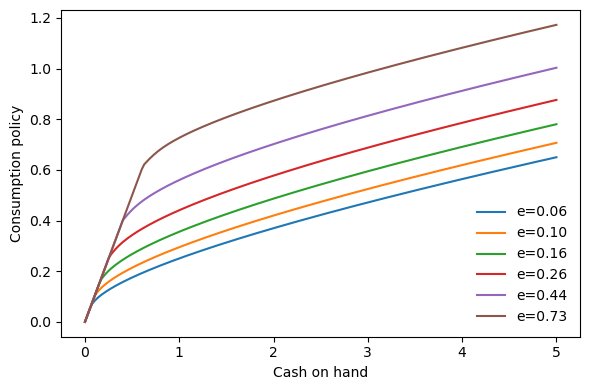

In [20]:
plt.figure(figsize=(6,4))
coh_grid = np.linspace(0, 5, 200)
for yi, yc in enumerate(y[:6]):
    plt.plot(coh_grid, c_func(yi, coh_grid), label=f'e={yc:.2f}')
plt.legend(framealpha=0)
plt.xlabel('Cash on hand')
plt.ylabel('Consumption policy')
plt.tight_layout()
plt.savefig('figures/lecture9_fig1.pdf', transparent=True)

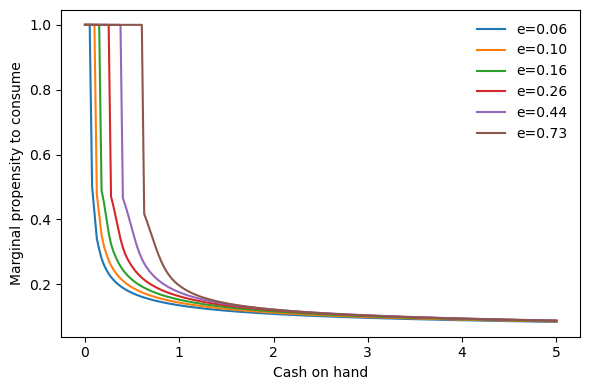

In [21]:
# plot numerical MPCs (could get more directly from cubic splines), which now only jump once as we leave constraint, then smooth
plt.figure(figsize=(6,4))
coh_grid = np.linspace(0, 5, 200)
for yi, yc in enumerate(y[:6]):
    plt.plot(coh_grid, (c_func(yi, coh_grid+1E-4) - c_func(yi, coh_grid-1E-4)) / 2E-4,
                        label=f'e={yc:.2f}')
plt.legend(framealpha=0)
plt.xlabel('Cash on hand')
plt.ylabel('Marginal propensity to consume')
plt.tight_layout()
plt.savefig('figures/lecture9_fig2.pdf', transparent=True)

# Iteration on distribution...
Start by assuming everyone's at 0 and let it fan out?

In [22]:
F = sm.distribution_ss(coh_endog, Pi, a_grid, y, r, sigma, share)

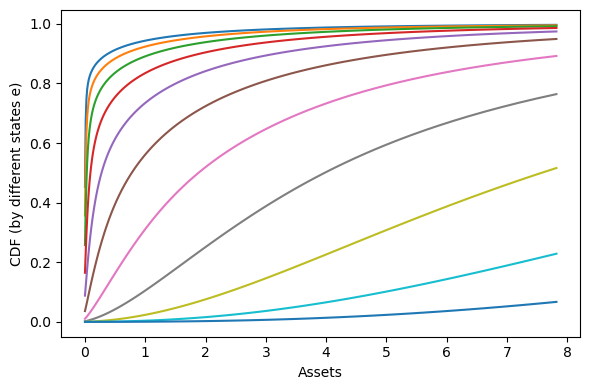

In [23]:
plt.figure(figsize=(6,4))
plt.plot(a_grid[:100], F.T[:100])
plt.xlabel('Assets')
plt.ylabel('CDF (by different states e)')
plt.tight_layout()
plt.savefig('figures/lecture9_fig3.pdf', transparent=True)

What are aggregate assets? Let's fit a cubic spline and then integrate. We'll use built-in interpolation for convenience rather than the Numba-compatible thing here.

In [24]:
As = np.empty_like(y)
for yi in range(len(y)):
    As[yi] = interpolate.CubicSpline(a_grid, 1-F[yi]).integrate(0, a_grid[-1])
As

array([ 0.22366212,  0.31005407,  0.45430153,  0.7046226 ,  1.15106304,
        1.95339104,  3.36775141,  5.75905281,  9.63378281, 15.72358977,
       25.1094834 ])